# 타이타닉 생존자 예측
1. 데이터 읽고 전체적인 상황 확인하기

#### 변수 설명
* pclass : 1, 2, 3등석 
* survived : 생존 여부. survived(생존-1), dead(사망-0)
* name : 이름
* sex : 
* 성별 : female(여성), male(남성)
* age : 나이
* sibsp : 함께 탑승한 형제 또는 배우자의 수
* parch : 함께 탑승한 부모 또는 자녀의 수
* ticket : 티켓 번호
* fare : 티켓 요금
* cabin : 선실 번호
* embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
* boat : 탈출한 보트가 있다면 boat 번호

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
raw_data = pd.read_excel('../Python_data/data/titanic.xls')
# raw_data.columns = raw_data.columns.str.strip().str.lower() # 컬럼명 소문자 변경
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


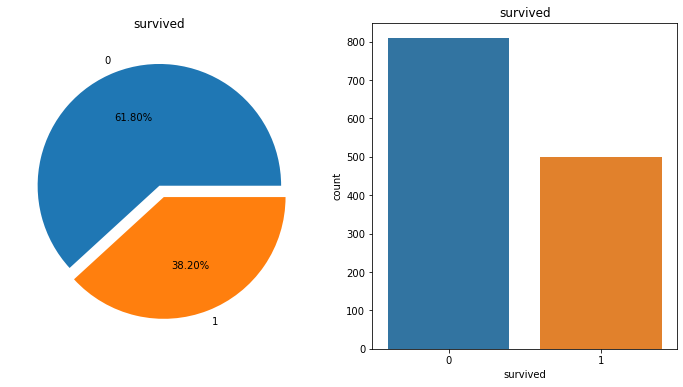

In [4]:
f, ax = plt.subplots(1,2, figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])

ax[0].set_title('survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('survived')
plt.show()

<AxesSubplot:>

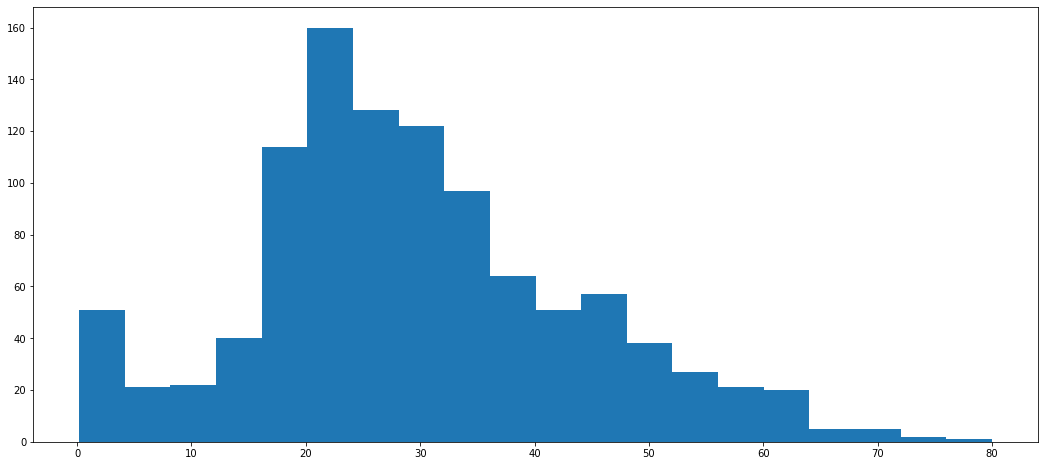

In [5]:
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False)

In [6]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [7]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


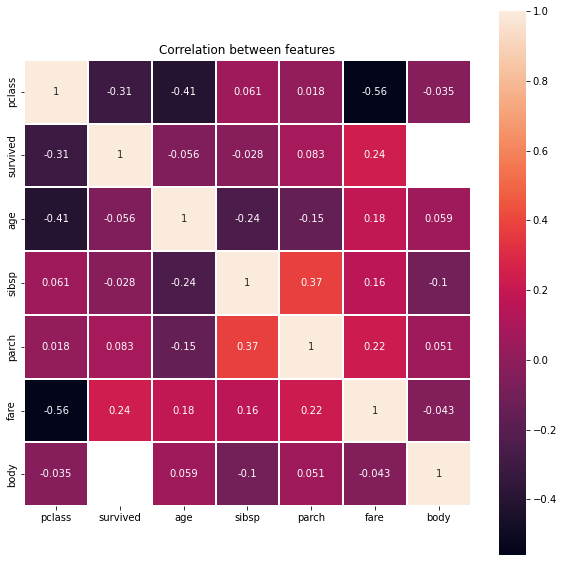

In [8]:
# 상관계수는 두 데이터의 상관관계만 확인 인과관계로 생각하면 안됩니다.
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square='white', annot=True)
plt.title('Correlation between features')
plt.show()

# 3. 나이 구간별 및 성별 생존률 확인하기

In [9]:
# pandas.cut : 데이터를 bin으로 분할하고 정렬해야할 경우 사용
raw_data['age_cat'] = pd.cut(raw_data['age'],
                            bins=[0,3,7,15,30,60,100],
                            include_lowest=True,
                            labels = ['baby', 'children', 'teenage', 'young',' adult', 'old'])
raw_data.head(20)
raw_data.to_excel(excel_writer='titanic_age.xlsx')

In [10]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


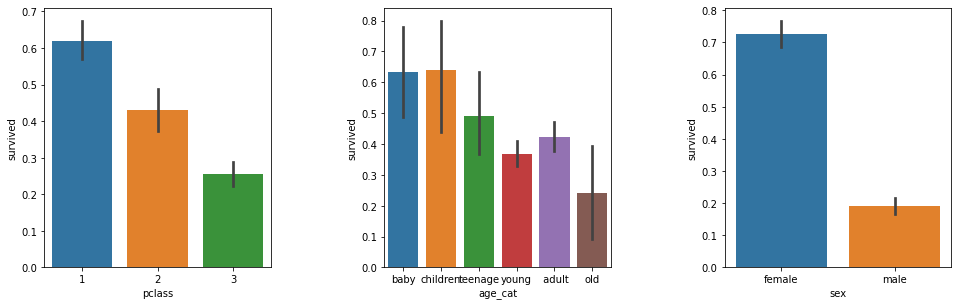

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)

plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)

plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)

plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)
plt.show()

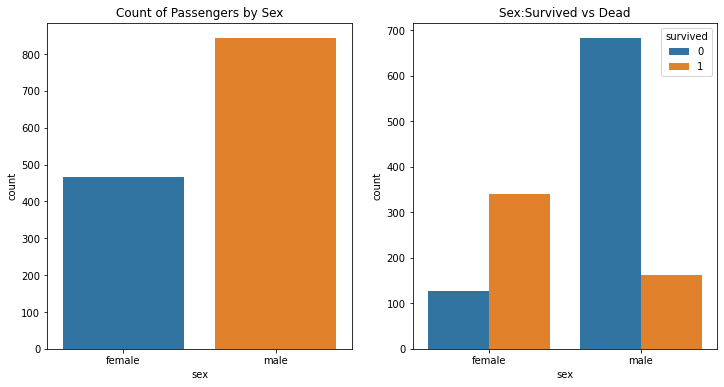

In [12]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [13]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


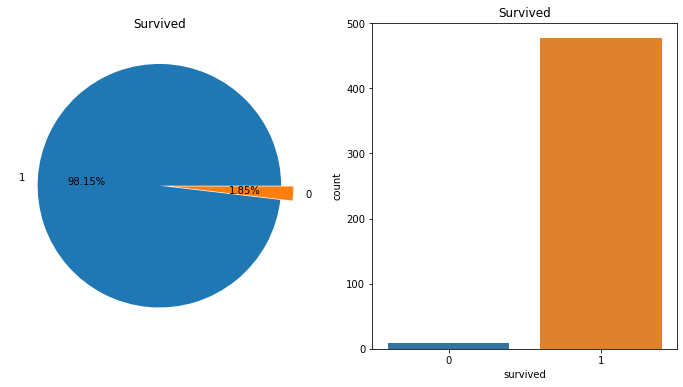

In [14]:
f, ax = plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()
# 생존자 예측하기 위한 모델을 만들 때 이 항목으로 특징을 잡으면 안됨 - 탑승 여부만 확인

In [15]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [16]:
tmp = []

for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [17]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [18]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   int64   
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 123.7+ KB


## 7. 생존자 예측을 위한 모델 수립

In [19]:
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,1,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, raw_data[['survived']],
                                                    test_size=0.1, random_state=13)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    int64  
 1   sex     940 non-null    int64  
 2   age     940 non-null    float64
 3   sibsp   940 non-null    int64  
 4   parch   940 non-null    int64  
 5   fare    940 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 51.4 KB


In [22]:
# X_train.reset_index(inplace=True, drop=True)
# X_train.head()

In [23]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [24]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3,0,37.0,0,0,7.7500
1,2,1,34.0,0,0,13.0000
2,3,0,38.0,1,5,31.3875
3,2,1,31.0,0,0,13.0000
4,1,0,63.0,1,0,221.7792


In [25]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=13)
tree_clf.fit(X_train, y_train)

print(f'Score : {tree_clf.score(X_train, y_train):.2f}')

Score : 0.83


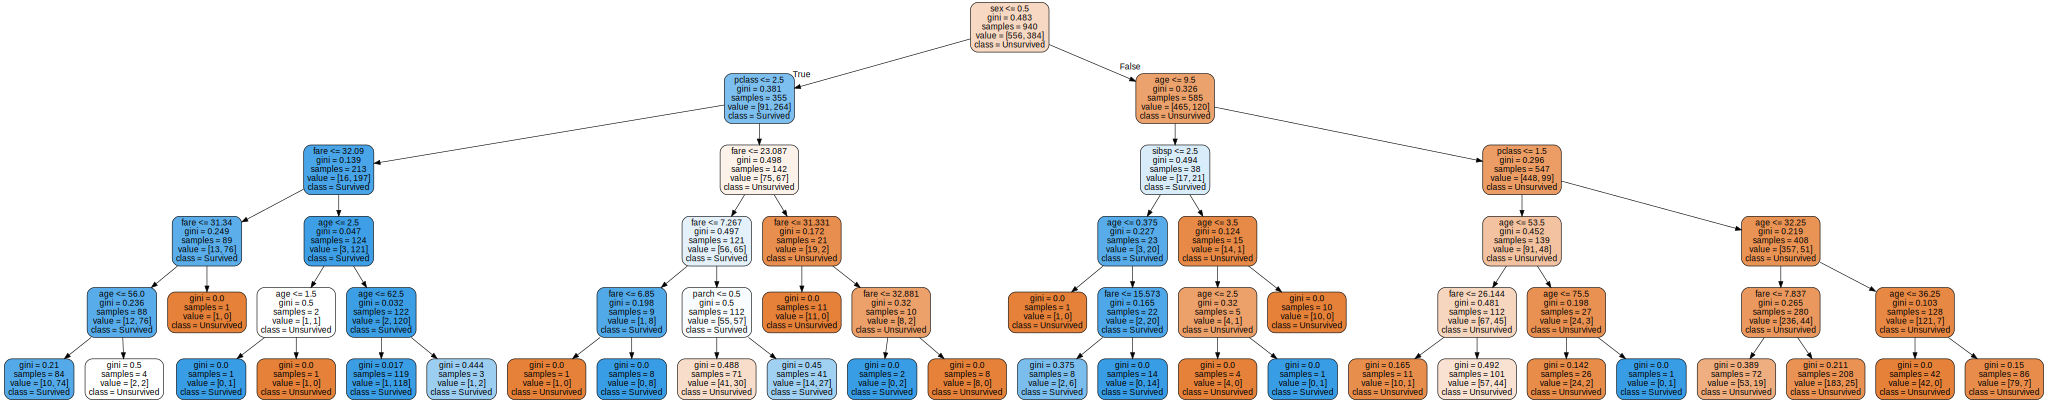

In [26]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

In [27]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print(f'Test accuracy is : {accuracy_score(y_test, y_pred):.2f}')

Test accuracy is : 0.83


## 8. 디카프리오 생존 예측

In [28]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3, 1, 19, 0, 0, 5] # 3등실, 남자, 19살, 형재자매X, 부모님X, 배삯 5
winslet = [1, 0, 17, 1, 1, 100]

In [29]:
tree_clf.predict_proba([winslet]) # 생존 확률 100%에 가까움

array([[0.00840336, 0.99159664]])

In [30]:
# predict_proba 확률 : 전체 1 (=0.02419355 + 0.97580645)
tree_clf.predict_proba([dicaprio])

array([[0.73611111, 0.26388889]])

In [31]:
seondo = [3, 1, 33, 0, 1, 10] 
tree_clf.predict_proba([seondo])

array([[1., 0.]])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
print(f'Score : {knn_clf.score(X_train, y_train):.2f}')

Score : 0.77


In [34]:
Ran_clf = RandomForestClassifier(n_estimators=13)
Ran_clf.fit(X_train, y_train)
print(f'Score : {Ran_clf.score(X_train, y_train):.2f}')

Score : 0.97


In [35]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [36]:
kf_tree_clf = DecisionTreeClassifier()
sco = 'accuracy'
score = cross_val_score(kf_tree_clf, X_train, y_train, cv=k_fold, scoring=sco)
print(score)
print(type(score))

[0.70212766 0.75531915 0.82978723 0.70212766 0.74468085 0.72340426
 0.73404255 0.77659574 0.72340426 0.77659574]
<class 'numpy.ndarray'>


In [37]:
round(np.mean(score)*100 , 2)

74.68